In [13]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [14]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_df = pd.read_csv("/Users/coderjuhi/Desktop/Challenges/Module 20 Challenge Supervised Machine Learning/credit-risk-classification/Resources/lending_data.csv")

# Review the DataFrame
lending_data_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [15]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = lending_data_df['loan_status']

# Separate the X variable, the features
X = lending_data_df.drop(columns=['loan_status'])

In [16]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [17]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [18]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1, stratify=y)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [19]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [20]:
# Make a prediction using the testing data
#Generate training predictions
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = lr_model.predict(X_test)

#Scores
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.9914878250103177
Testing Data Score: 0.9924164259182832


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [21]:
# Generate a confusion matrix for the model
# Import the model for sklearn confusion matrix
from sklearn.metrics import confusion_matrix

# Create and save the confusion matrix for the testing data
confusion_matrix1 = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print("Confusion matrix using testing data:")
print(confusion_matrix1)

Confusion matrix using testing data:
[[18679    80]
 [   67   558]]


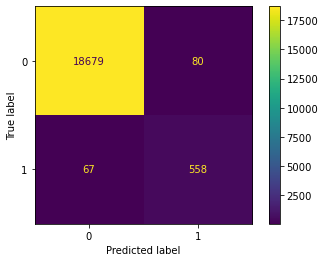

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay 
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, testing_predictions) 

disp= confusion_matrix(y_test, testing_predictions, labels=lr_model.classes_) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_) 

disp.plot()
 
plt.show()

In [23]:
# Print the classification report for the model
# Create and save the testing classification report
target_names = ["healthy loan", "high risk loan"]
testing_report = classification_report(y_test, testing_predictions, target_names=target_names)

# Print the testing classification report
print("Classification report using testing data:")
print(testing_report)

Classification report using testing data:
                precision    recall  f1-score   support

  healthy loan       1.00      1.00      1.00     18759
high risk loan       0.87      0.89      0.88       625

      accuracy                           0.99     19384
     macro avg       0.94      0.94      0.94     19384
  weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels? 

### **Overview**
The purpose of this analysis is to evaluate the performance of the machine learning model, which evaluates the credit worthiness of a borrower for a loan, based on results from the confusion matrix and classification report. The dataset used for this challenge is historical lending activity data from a peer-to-peer lending services company. The variable that I am trying to predict is called "loan_status," which has one of two values, either 1 for high-risk loan and 0 for healthy loan. Since "loan_status" has binary outcomes, we will use logistic regression modeling to evaluate credit worthiness of borrowers. 

There are three steps I went through for logistic regression modeling. First, I went through preprocess, which meant that I split the data into training and testing data. The second step I went through is training. During training, I fit the logistic regression model using the training dataset, which is typically 75% of the entire dataset. Lastly, I used the logistic regression model to predict labels using the remaining 25% of the data called testing data. 

### **Results**
The accuracy, precision, and recall analysis below is based on the classification report. 

**Accuracy:**

-Accuracy is 0.99, which is very high.

-Out of all the loans, 99% of the loans were correctly identified as either high risk or healthy loans. 

**Precision:**

-Precision is 0.87, which is relatively high.

-Out of all the loans that were classified as high risk, 87% of the loans were actually high risk.

**Recall:** 

-Recall is 0.89, which is relatively high.

-Out of all the loans that are indeed high risk loans, 89% of the loans were classified correctly.

### **Summary**
Considering that there are high values for accuracy, precision, and recall, I recommend this logistic regression model. 


---